In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import keras as k

# Read the data

In [17]:
df=pd.read_csv('/Users/hejingze/Desktop/CS448 final_project/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [18]:
df=df.drop(labels='filename',axis=1)

In [19]:
sounds="/Users/hejingze/Desktop/CS448 final_project/Data/genres_original/country/country.00050.wav"
data , sr=librosa.load(sounds)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [20]:
librosa.load(sounds, sr=45600)

(array([ 0.04446705,  0.06373049,  0.0576882 , ..., -0.13878523,
        -0.11868108, -0.05903753], dtype=float32),
 45600)

# Visualization

<ipython-input-21-959a3b75a561>:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


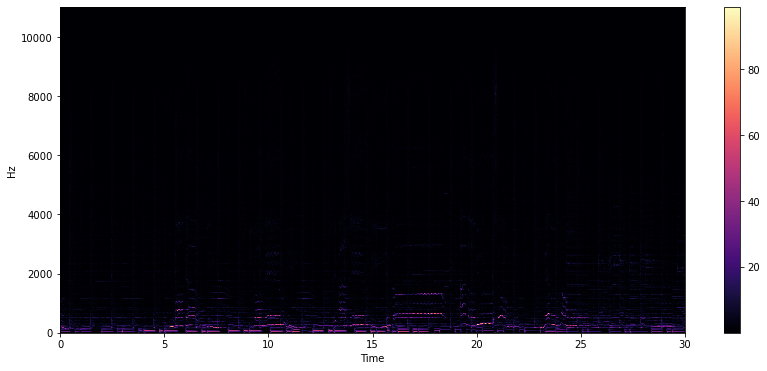

In [21]:
stft =librosa.stft(data)
arrs =librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

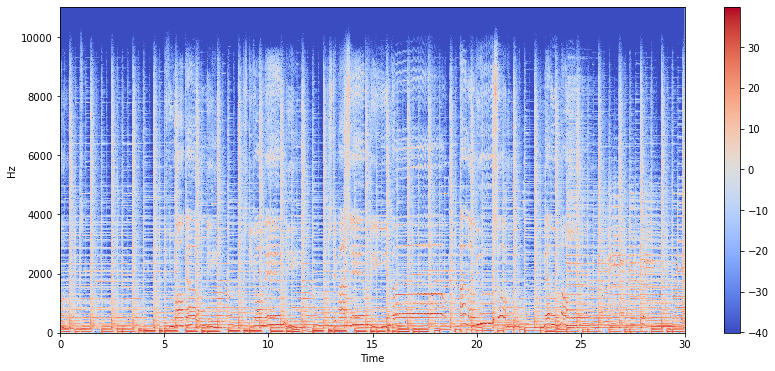

In [22]:
stft=librosa.stft(data)
arrs=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(arrs,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

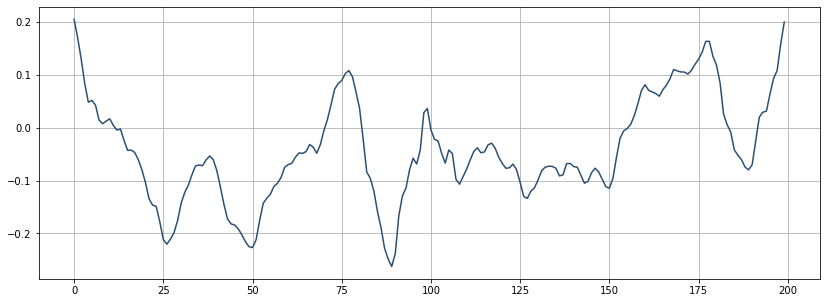

In [23]:
rows=1000
cols=1200
plt.figure(figsize=(14,5))
plt.plot(data[rows:cols],color="#2B4F72")
plt.grid()

In [24]:
arrs2=librosa.zero_crossings(data[rows:cols],pad=False)

# Extracting Features

In [25]:
lst1=df.iloc[:,-1]
encode_arr = LabelEncoder()
arr3 = encode_arr.fit_transform(lst1)
print(df.iloc[:,:-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

In [26]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [27]:
X_train ,X_test,y_train,y_test=train_test_split(X,arr3,test_size=0.33)
print(len(y_train))
print(len(y_test))


6693
3297


# Build the Model

In [28]:
def helper_fun_train(model,epochs,optimizer):
    batch_size =128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy'
    )
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [29]:
model=k.models.Sequential([
    k.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),
    k.layers.Dense(256,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(128,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(64,activation='relu'),
    k.layers.Dropout(0.2),
    k.layers.Dense(10,activation='softmax'),   
])
print(model.summary())
model_history=helper_fun_train(model=model,epochs=600,optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               30208     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

# Evaluation

In [30]:
overall_losses, overall_accuracies = model.evaluate(X_test,y_test,batch_size=128)
print("Test Loss is:",overall_losses)
print("Accuracy is:",overall_accuracies*100)

26/26 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.9284
Test Loss is: 0.6078431606292725
Accuracy is: 92.84197688102722
